# Finding Heavy Traffic Indicators on I-94

This project aims to analyze the factors influencing heavy traffic occurrences on Interstate 94 (I-94). By delving into various indicators, we strive to gain insights into the patterns and conditions leading to congestion on this route.

Our primary goal is to identify predictive indicators that can accurately forecast instances of heavy traffic on I-94. By understanding these factors, we aim to develop strategies and solutions to mitigate traffic congestion, thereby enhancing overall transportation efficiency and improving commuter experiences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
print(i_94.head())
print('\n')
print(i_94.tail())
print('\n')
i_94.info()

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0 

The dataset documentation indicates that the traffic data was recorded by a station situated approximately midway between Minneapolis and Saint Paul. It's important to note that this station exclusively captures data on westbound traffic, which refers to cars moving from east to west along the Interstate 94 (I-94) route.

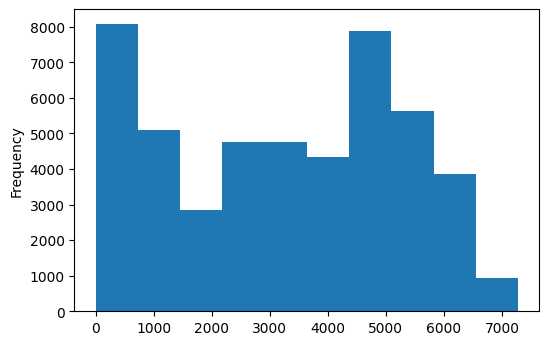

In [2]:
i_94['traffic_volume'].plot.hist()
plt.show()

In [3]:
volume_desc = i_94['traffic_volume'].describe()
volume_desc

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Traffic Volume Insights

Between **October 2, 2012, at 09:00:00** and **September 30, 2018, at 23:00:00**, the hourly traffic volume on the **Interstate 94 (I-94)** varied widely, ranging from **0 to 7,280 cars**. On average, approximately **3,260 cars** passed the station each hour during this period.

Interestingly, about **25% of the time**, the traffic volume was relatively low, with **1,193 cars or fewer** passing the station each hour. This likely occurs during nighttime hours or when there are road construction activities underway. Conversely, approximately **25% of the time**, the traffic volume surged to more than four times this low volume, reaching **4,933 cars or more per hour**.

This observation provides a compelling direction for our analysis: comparing daytime traffic data with nighttime traffic data to identify patterns and factors influencing traffic volume fluctuations.

#### Dataset Division

We'll start by dividing the dataset into two parts:

- **Daytime data**: hours from **7 a.m. to 7 p.m.** (12 hours)
- **Nighttime data**: hours from **7 p.m. to 7 a.m.** (12 hours)

While this criterion may not perfectly distinguish between nighttime and daytime, it serves as a good starting point for our analysis.


In [4]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


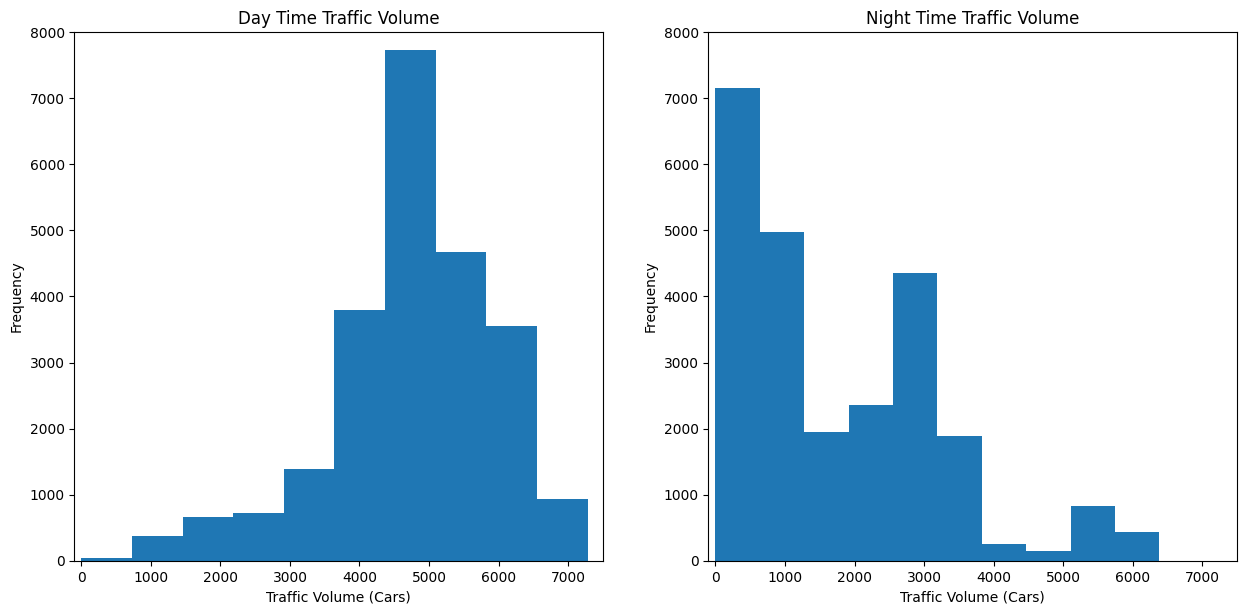

In [5]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
day['traffic_volume'].plot.hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Day Time Traffic Volume')
plt.xlabel('Traffic Volume (Cars)')

plt.subplot(1, 2, 2)
night['traffic_volume'].plot.hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Night Time Traffic Volume')
plt.xlabel('Traffic Volume (Cars)')

plt.show()

In [6]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for daytime traffic volume shows a left-skewed distribution, indicating that a majority of the traffic volume values are high. Specifically, 75% of the time, there are 4,252 or more cars passing the station each hour, as 25% of the values fall below this threshold.

On the other hand, the histogram for nighttime traffic data exhibits a right-skewed distribution, suggesting that most of the traffic volume values are low. About 75% of the time, the number of cars passing the station each hour is less than 2,819.

While there are occasional spikes with measurements exceeding 5,000 cars per hour, nighttime traffic generally remains light. Given our focus on identifying indicators of heavy traffic, we will concentrate solely on the daytime data for further analysis.

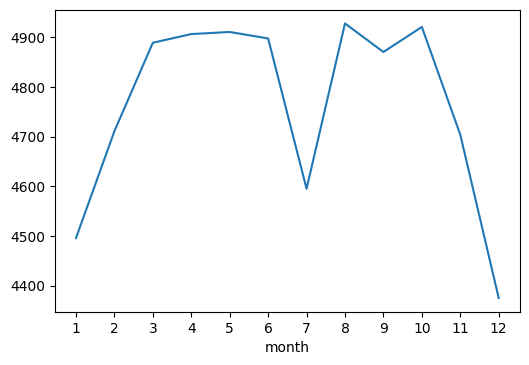

count      12.000000
mean     4767.211825
std       190.013332
min      4374.834566
25%      4676.829675
50%      4880.096353
75%      4907.951131
max      4928.302035
Name: traffic_volume, dtype: float64

In [8]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.xticks(ticks=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.show()

by_month['traffic_volume'].describe()

Traffic appears to be lighter during the colder months (November–February) and more intense in the warmer months (March–October). However, there's an intriguing exception: July. 

Let's explore this further

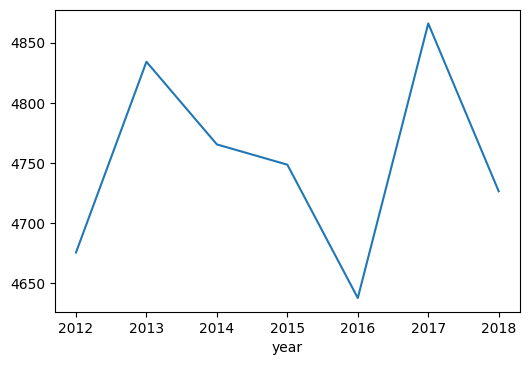

In [9]:
day['year'] = day['date_time'].dt.year
by_year = day.groupby('year').mean()
by_year['traffic_volume'].plot.line()

We can see that traffic is generally heavy in July, with a couple of exceptions: it was low in 2012 and 2016. These instances could be attributed to construction activities during these periods, as discussed in [this article](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).

### Time Indicators (II)

Now, let's explore the variations in traffic volume based on the day of the week.

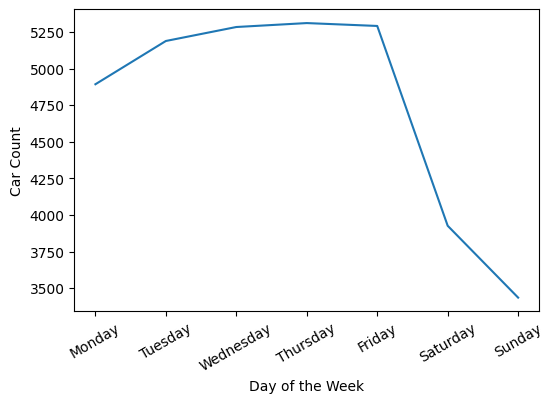

In [10]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=30)
plt.xlabel('Day of the Week')
plt.ylabel('Car Count')
plt.show()

Here, we can observe that traffic during weekdays is significantly heavier compared to weekends. This difference could be attributed to people using this road for commuting to work, resulting in reduced traffic on weekends when many people are not working.

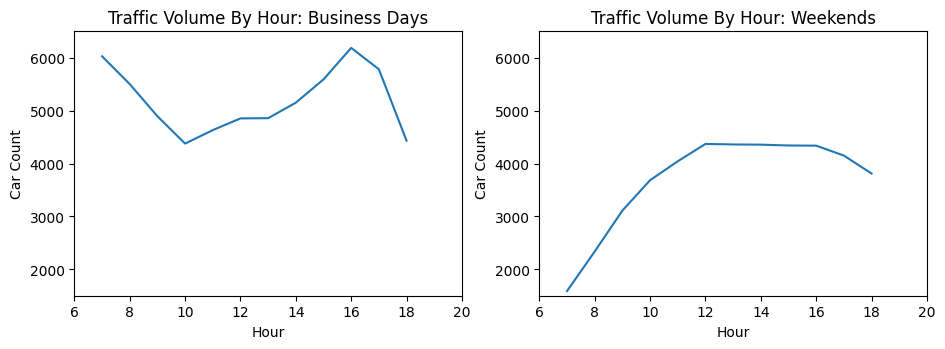

In [11]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Business Days')
plt.xlabel('Hour')
plt.ylabel('Car Count')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 20)
plt.ylim(1500, 6500)
plt.title('Traffic Volume By Hour: Weekends')
plt.xlabel('Hour')
plt.ylabel('Car Count')

plt.show()

Throughout the day, traffic volume tends to be higher on business days than on weekends. As expected, peak traffic occurs around 7 a.m. and 4 p.m., corresponding to typical commuting times, with volumes exceeding 6,000 cars during these rush hours.

In summary, we've identified several time-related indicators of heavy traffic:

- Traffic is generally heavier during warm months (March–October) compared to cold months (November–February).
- Traffic tends to be heavier on business days than on weekends.
- Peak traffic hours on business days are around 7 a.m. and 4 p.m.

## Weather Indicators 

In [12]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


From the information provided earlier, we can identify that `temp`, `rain_1h`, `snow_1h`, and `clouds_all` are numerical columns in the dataset. Our initial analysis will focus on determining the correlation between these variables and the traffic volume.

In [13]:
weather_numeric = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']
i_94.corr()['traffic_volume'][weather_numeric]

temp          0.130299
rain_1h       0.004714
snow_1h       0.000733
clouds_all    0.067054
Name: traffic_volume, dtype: float64

The primary correlation of significance is with temperature (`temp`), which has a correlation coefficient of 0.13 with the traffic volume. This correlation is relatively weak, suggesting a modest relationship between temperature and traffic volume.

### Weather Types

To begin our analysis, we will group the data by `weather_main` and examine the average `traffic_volume` associated with each weather category.

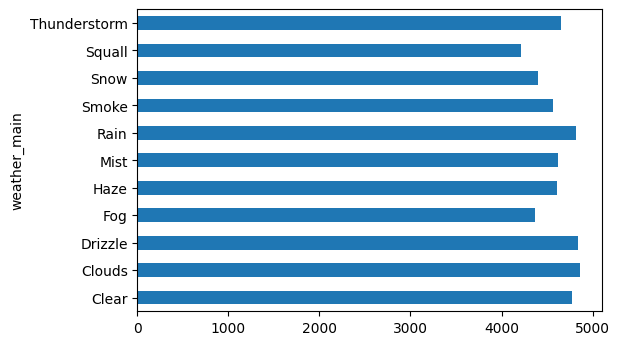

In [18]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

It appears that no weather type results in traffic volume exceeding 5,000 cars. This presents a challenge in identifying a heavy traffic indicator. To explore further, let's also group the data by `weather_description`, which provides a more detailed classification of weather conditions.

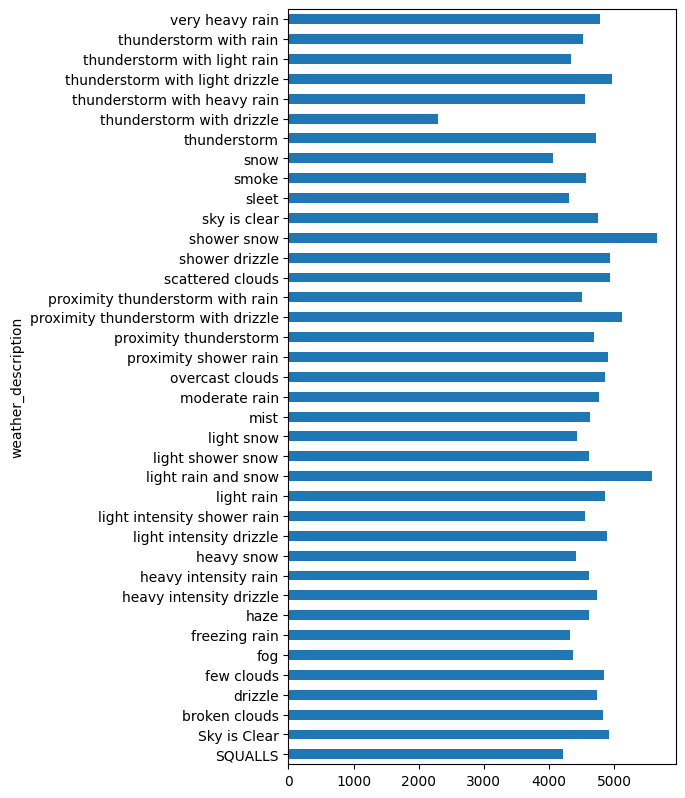

In [23]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))
plt.show()

Interestingly, there are three weather types where traffic volume exceeds 5,000 cars:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

One possible explanation could be that people tend to drive more cautiously and at lower speeds during inclement weather, leading to congestion despite the adverse conditions. This cautious driving behavior during challenging weather conditions could contribute to higher traffic volumes during these specific weather events.

# Conclusions